# Full EDA Notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load Dataset

In [4]:

column_names = [
    "Age","Gender","TB","DB","Alkphos","Sgpt","Sgot",
    "TP","ALB","A/G Ratio","Dataset Label"
]

df = pd.read_csv("/workspaces/ml-notes-and-code/ilpd_ml.csv", header=None, names=column_names)
df.head()


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Dataset Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Clean Gender

In [5]:

df['Gender'] = (
    df['Gender'].astype(str).str.lower().str.strip()
    .map({'male':1,'female':0})
    .fillna(0).astype(int)
)
df['Gender'].unique()


array([0, 1])

## Clean Age

In [6]:

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'] = df['Age'].apply(lambda x: 90 if x>89 else x)
df['Age'].describe()


count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

## Clean Numeric Columns

In [7]:

num_cols = ['TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G Ratio']
df[num_cols] = df[num_cols].apply(lambda c: pd.to_numeric(c, errors='coerce').fillna(c.median()))
df.head()


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Dataset Label
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Summary & Missing Values

In [8]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            583 non-null    int64  
 1   Gender         583 non-null    int64  
 2   TB             583 non-null    float64
 3   DB             583 non-null    float64
 4   Alkphos        583 non-null    int64  
 5   Sgpt           583 non-null    int64  
 6   Sgot           583 non-null    int64  
 7   TP             583 non-null    float64
 8   ALB            583 non-null    float64
 9   A/G Ratio      583 non-null    float64
 10  Dataset Label  583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


Age              0
Gender           0
TB               0
DB               0
Alkphos          0
Sgpt             0
Sgot             0
TP               0
ALB              0
A/G Ratio        0
Dataset Label    0
dtype: int64

## Descriptive Statistics

In [9]:

desc = df.describe().T
desc['skew'] = df.skew()
desc['kurtosis'] = df.kurtosis()
desc


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0,-0.029385,-0.560066
Gender,583.0,0.756432,0.429603,0.0,1.0,1.00,1.0,1.0,-1.197919,-0.566947
TB,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0,4.907474,37.163792
DB,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7,3.212403,11.352529
Alkphos,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0,3.765106,17.752828
Sgpt,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0,6.549192,50.579450
Sgot,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0,10.546177,150.919884
TP,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6,-0.285672,0.233039
ALB,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5,-0.043685,-0.387905
A/G Ratio,583.0,0.946947,0.318495,0.3,0.7,0.93,1.1,2.8,0.996780,3.326363


## Distribution Plots

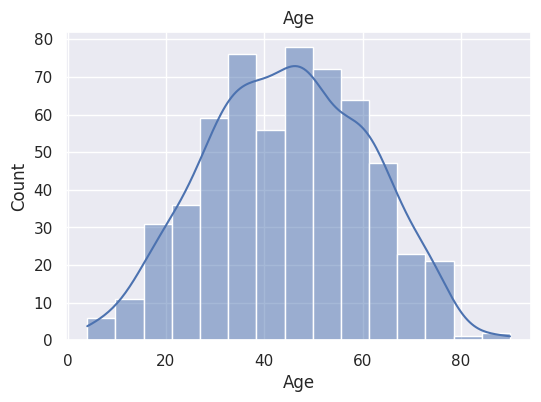

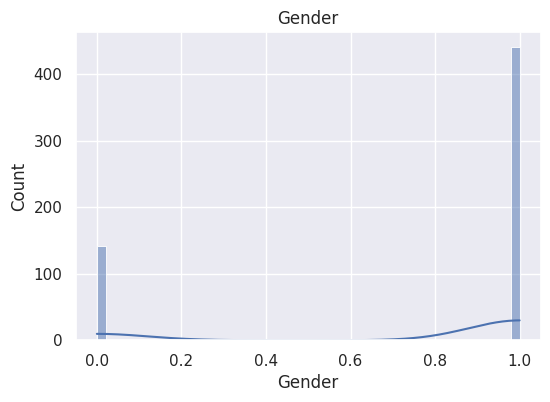

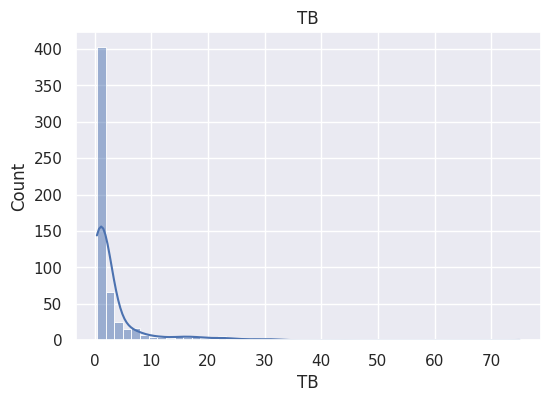

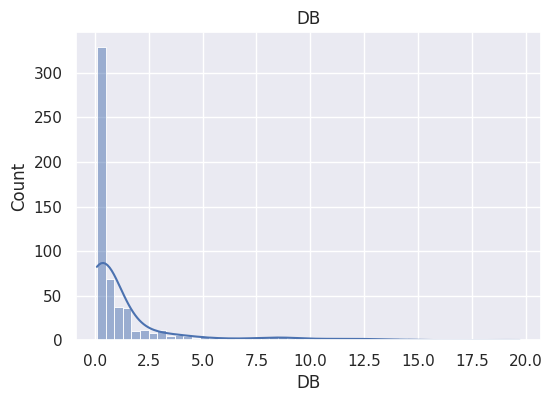

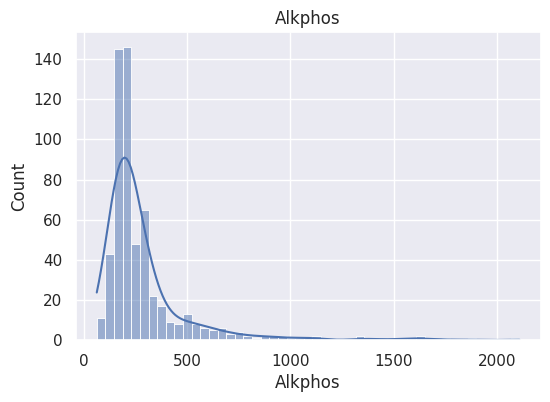

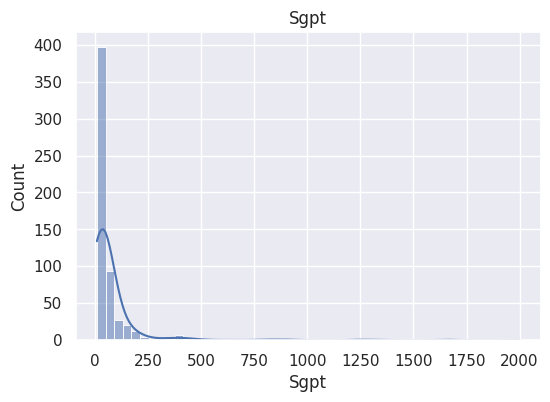

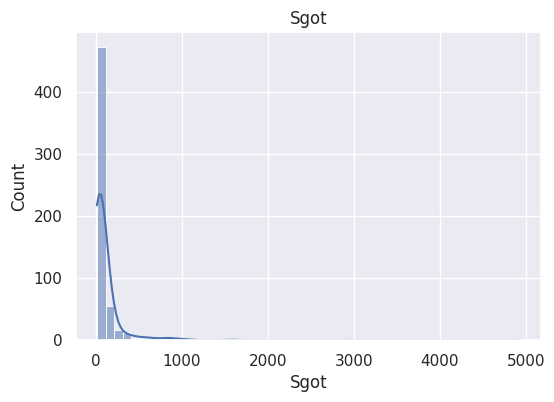

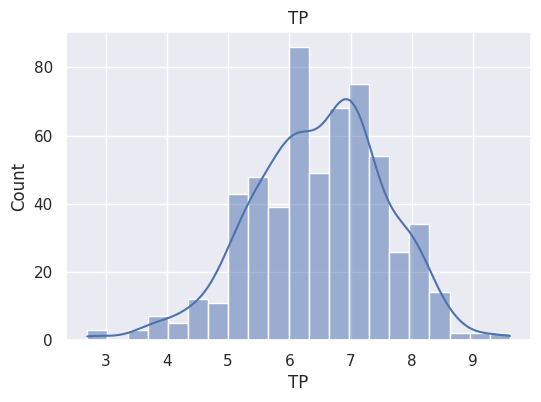

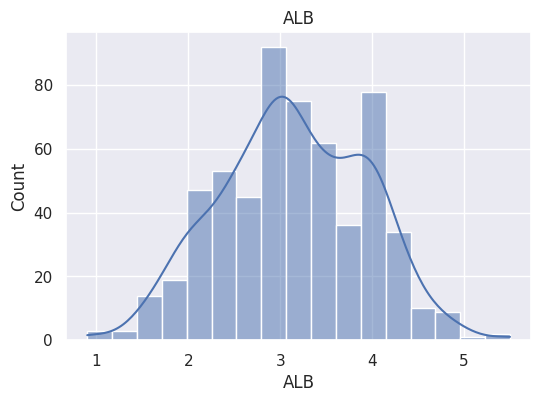

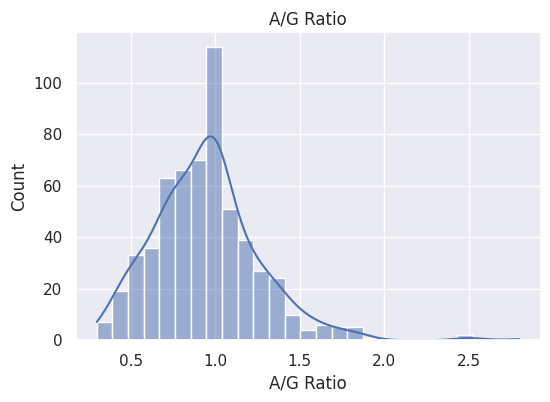

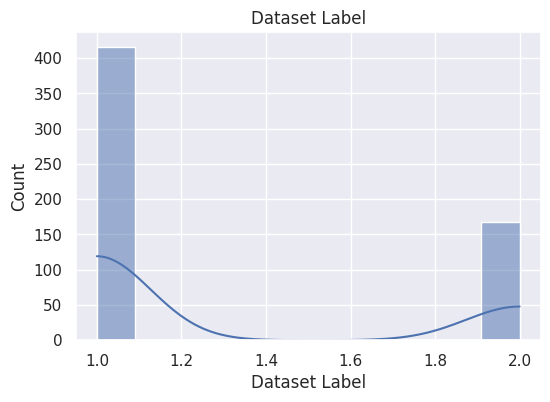

In [10]:

for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


## Boxplots

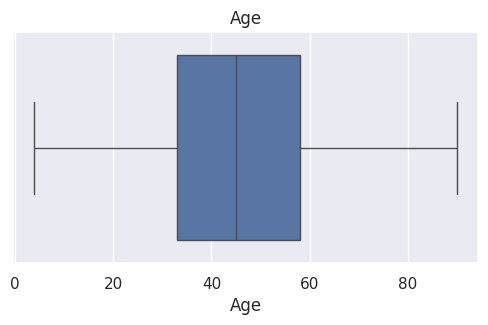

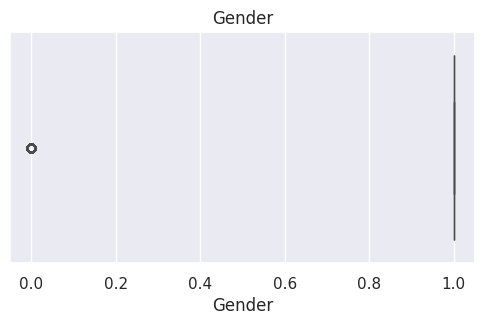

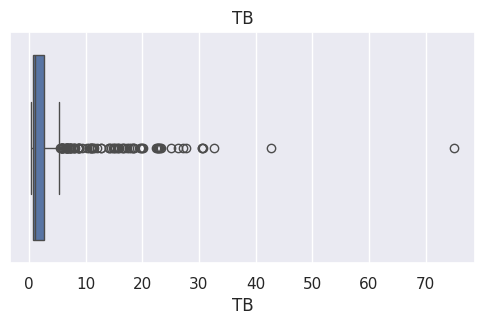

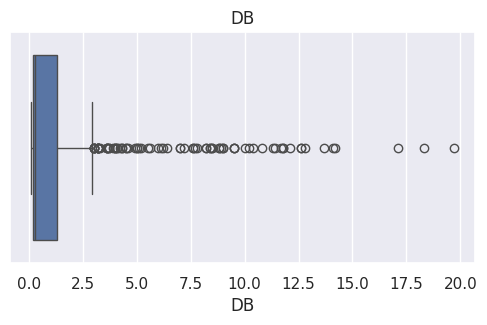

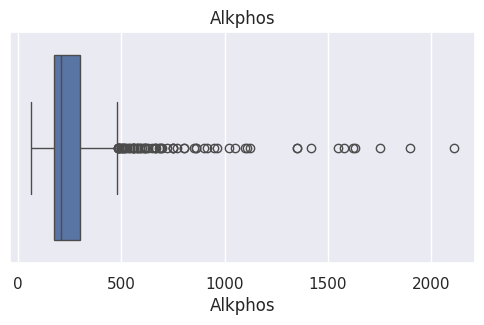

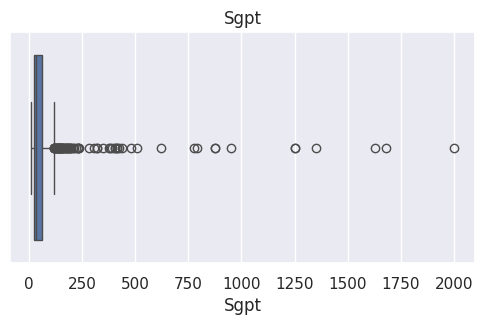

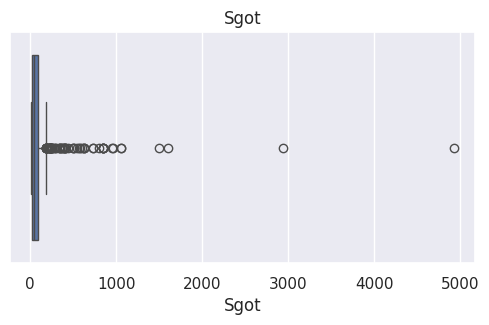

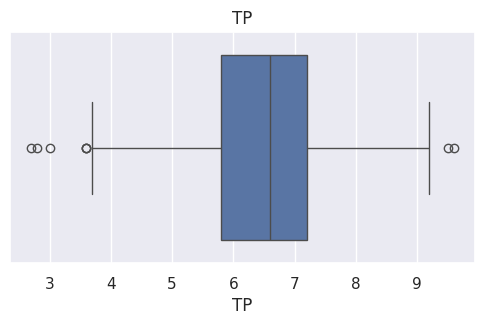

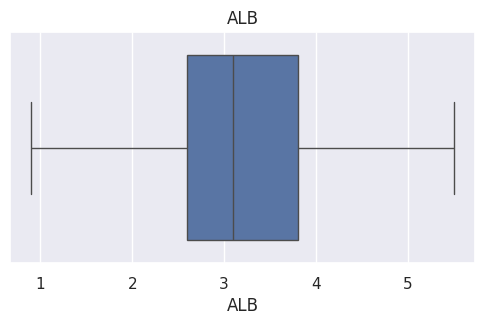

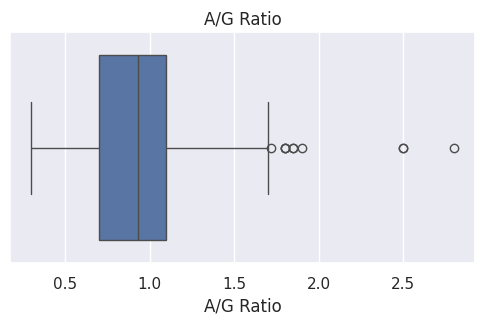

In [11]:

for col in df.columns:
    if col != 'Dataset Label':
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()


## Correlation Heatmap

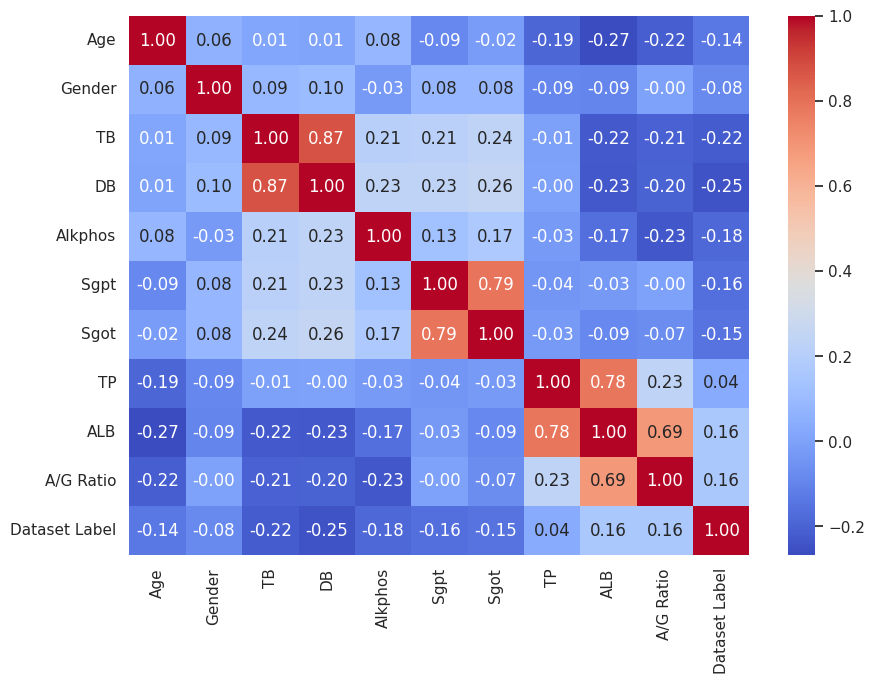

In [12]:

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


## Pairplot

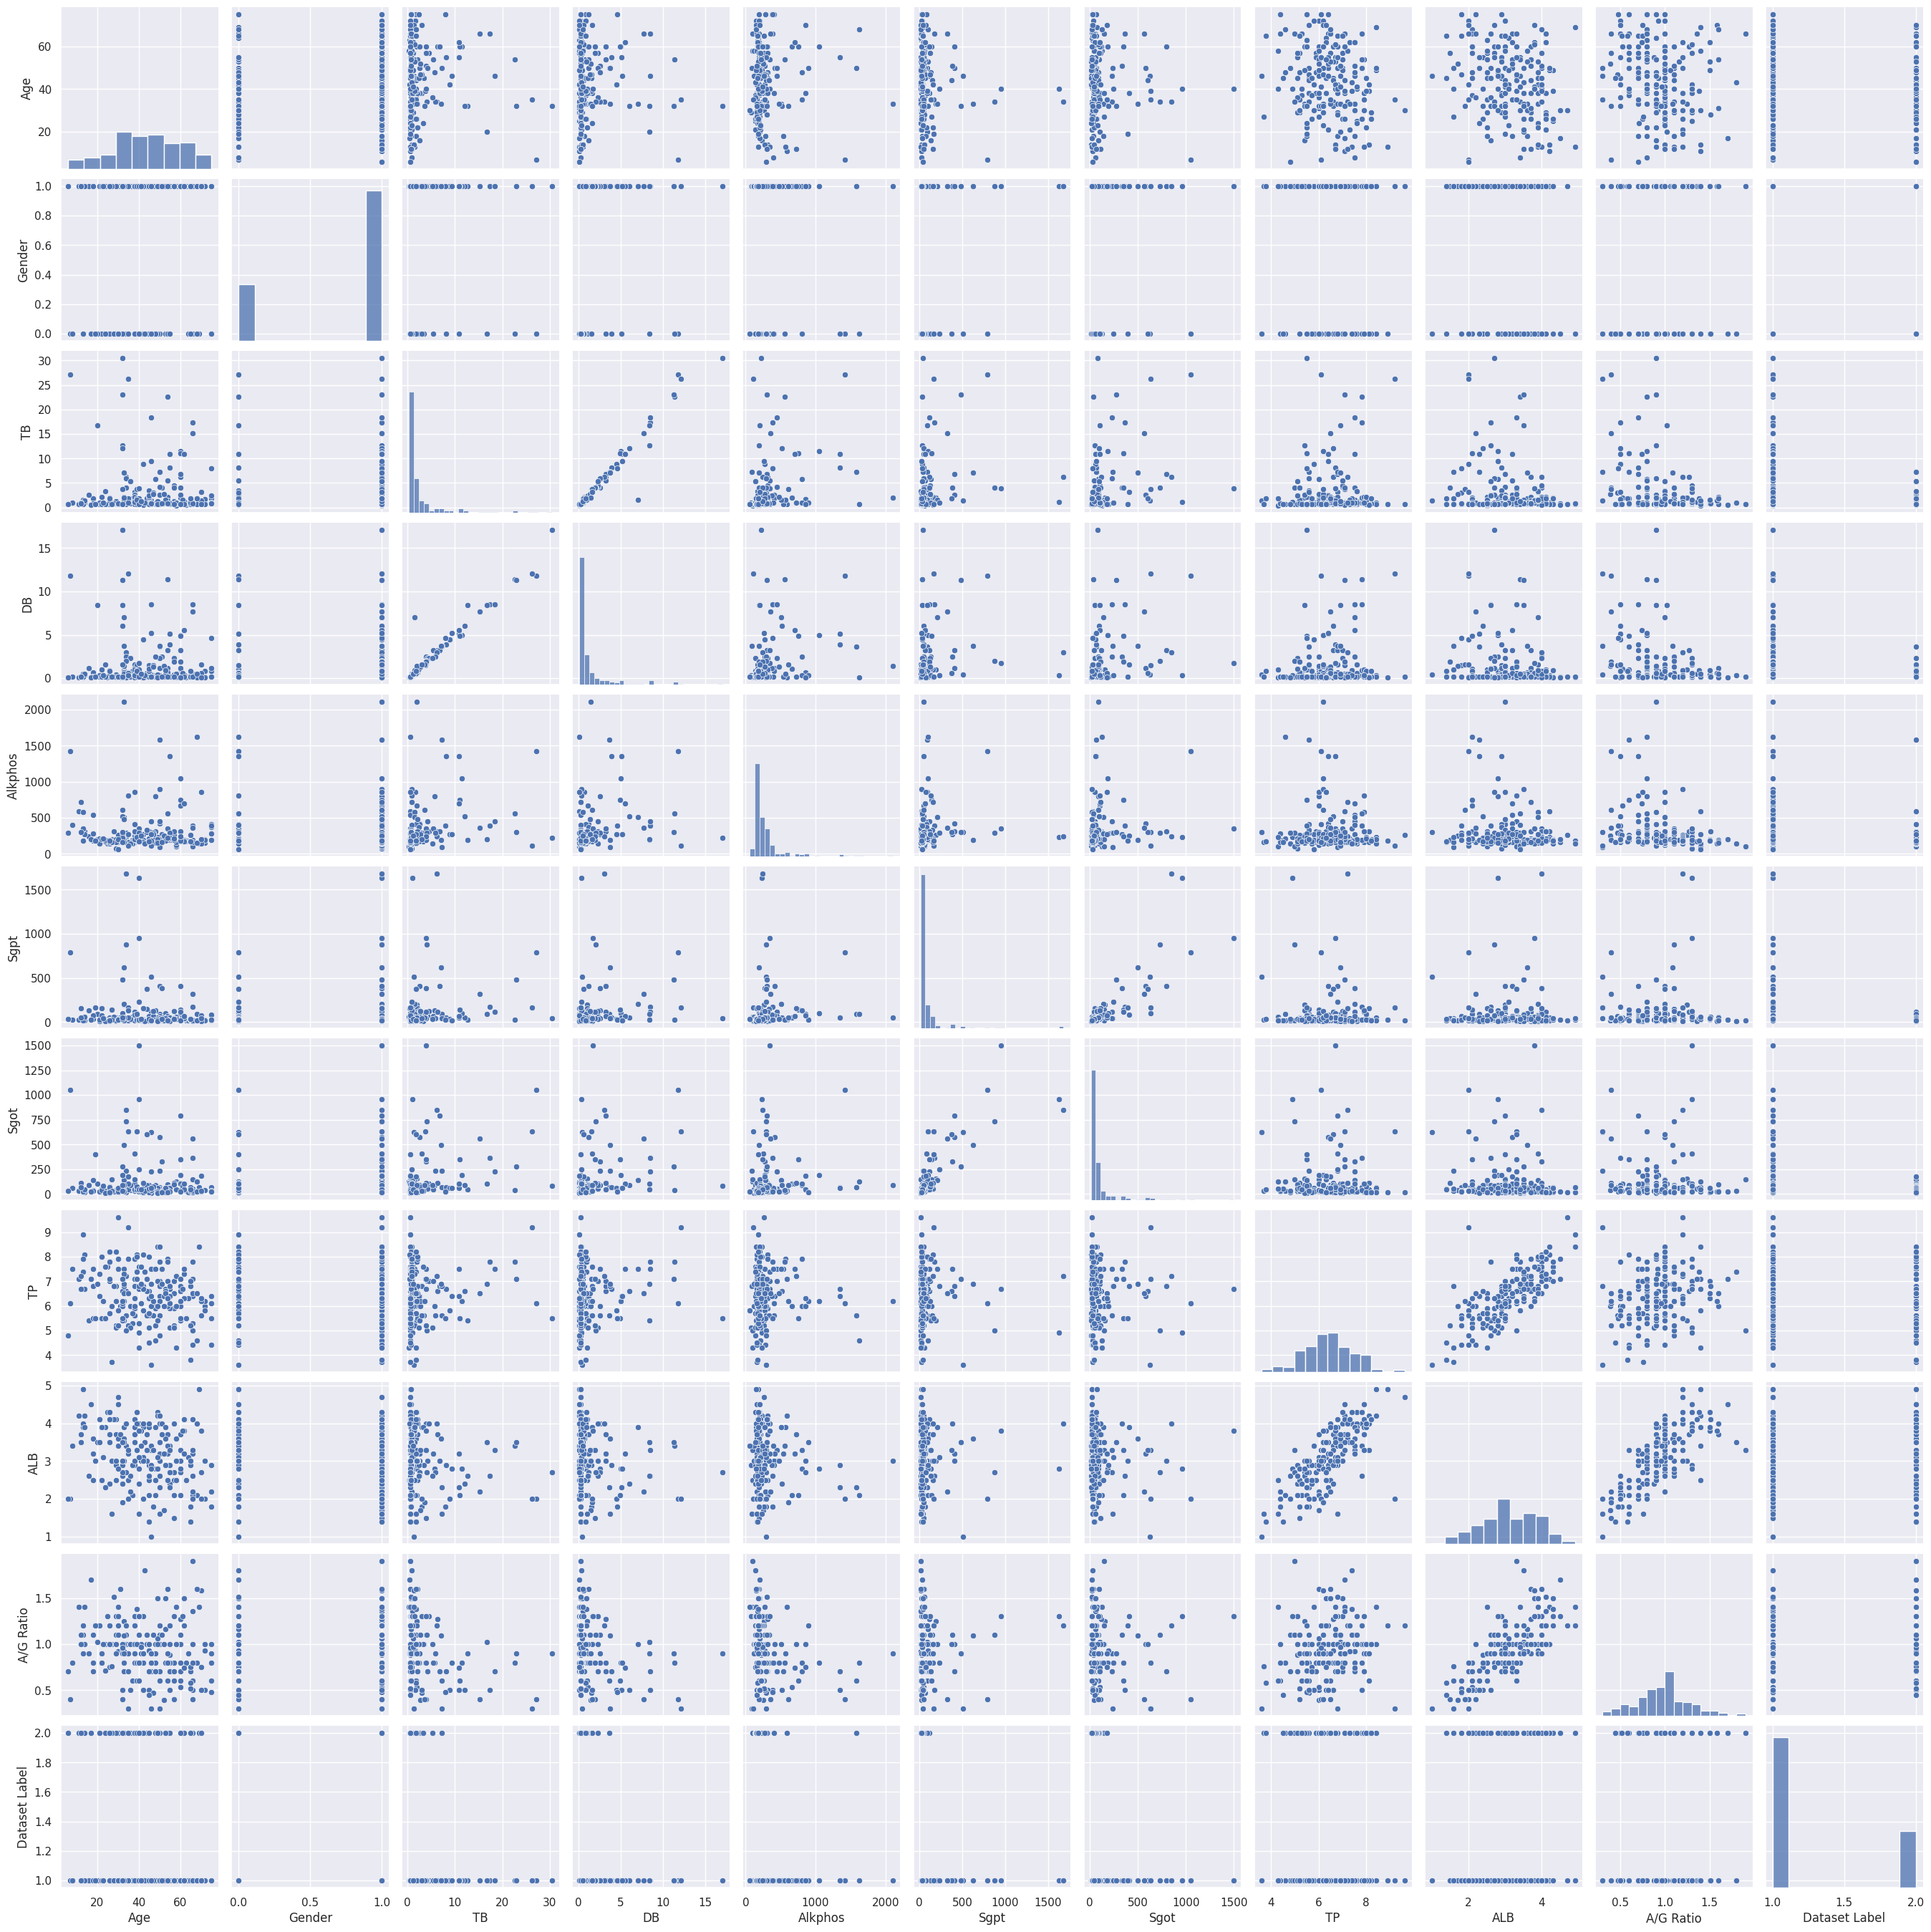

In [13]:

sns.pairplot(df.sample(200) if len(df)>200 else df)
plt.show()


## Outlier Report

In [14]:

outliers={}
for col in df.columns:
    if col=='Dataset Label': continue
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    low=Q1-1.5*IQR
    high=Q3+1.5*IQR
    mask=(df[col]<low)|(df[col]>high)
    outliers[col]={
        'Lower Bound':low,
        'Upper Bound':high,
        'Outlier Count':mask.sum(),
        'Outlier %':100*mask.sum()/len(df)
    }
pd.DataFrame(outliers).T


,Lower Bound,Upper Bound,Outlier Count,Outlier %
Age,-4.50,95.50,0.0,0.000000
Gender,1.00,1.00,142.0,24.356775
TB,-1.90,5.30,84.0,14.408233
DB,-1.45,2.95,81.0,13.893654
Alkphos,-8.25,481.75,69.0,11.835334
Sgpt,-33.25,116.75,73.0,12.521441
Sgot,-68.00,180.00,66.0,11.320755
TP,3.70,9.30,8.0,1.372213
ALB,0.80,5.60,0.0,0.000000
A/G Ratio,0.10,1.70,10.0,1.715266


## Save Cleaned Dataset

In [15]:

df.to_csv("cleaned_dataset.csv", index=False)
print("Saved cleaned_dataset.csv")


Saved cleaned_dataset.csv
